In [1]:
# data manipilation
import pandas as pd
import numpy as np

import json

# plot
import matplotlib.pyplot as plt

# functions
from functions.functions import *

In [2]:
# loading data
with open('data\wordsapi_sample.json') as json_file:
    data_lex = json.load(json_file)

with open("Data\wordle-nyt-allowed-guesses.txt", "r", newline="\n") as guess:
    data_guess = guess.read().splitlines()

with open("Data\wordle-nyt-answers-alphabetical.txt", "r", newline="\n") as awn:
    data_awn = awn.read().splitlines()

# create word list from dictionary entries
word_list = list(data_lex.keys())

In [3]:
lex_clean = by_size(word_list,5)

In [4]:
merge_list = lex_clean + data_guess + data_awn
print(len(merge_list))
clean_list = list(set(merge_list))
print(len(clean_list))

13928
13316


In [5]:
letter = count_letters(clean_list)

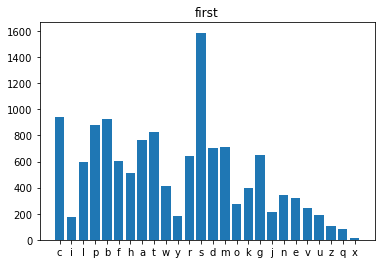

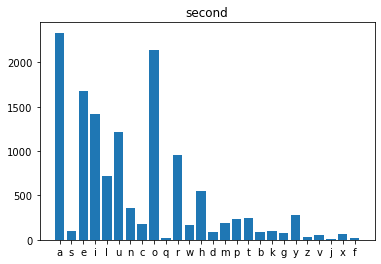

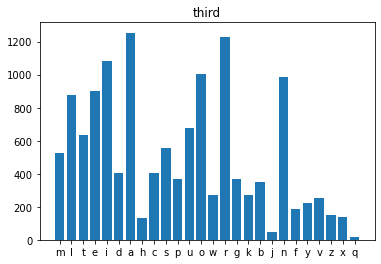

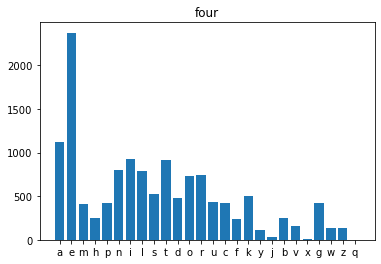

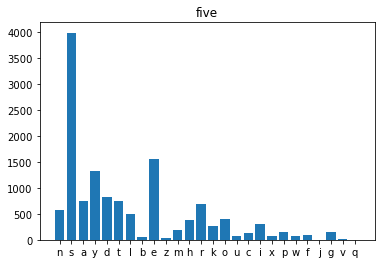

In [6]:
for p in letter:
    title_list = ["first","second","third","four","five"]
    plt.bar(list(letter[p].keys()), letter[p].values())
    plt.title(title_list[p])
    plt.show()

In [7]:
word_rated, word_begin = rate_word(clean_list,letter)
sorted(list(word_begin.values()), reverse= True)
list(word_begin.keys())[list(word_begin.values()).index(10862)]


'cares'

In [8]:
class Game:
    def __init__(self):
        self.line = 0
        self.correct_wrong = dict() # dictonary of lists    {"s",l}
        self.correct = dict()       # dictonary of integers {"s",i}
        self.wrong = []             # list of stings ["s"]
    
    def guess(self, string_guess):
        self.line += 1

    
        


In [9]:
guess_1 = "cares"

In [30]:
in_let = {"a":[],"e":[],"s":[],"h":[]}
correct_let = {"s":0,"a":2,"e":4,"h":1}
worng_let = ["c","r","t","l","k"] #,"h","t","l","i","g","m","b"

In [31]:
len(clean_list)

13316

In [32]:
def word_list_adjust(privious_list, dict_correct_wrong, list_worng, dict_correct):
    filter_correct = []
    # keep words which contain the correct letters
    for letter in dict_correct_wrong.keys():
        if len(filter_correct) == 0:
            filter_correct = [word for word in privious_list if letter in word]
        else:
            cache = [i for i in privious_list if letter in i]
            filter_correct = [element for element in filter_correct if element in cache]

    # delete words from list containing worng letters
    word_list = []
    for l in range(len(list_worng)):
        if len(word_list) == 0:
            word_list = [i for i in filter_correct if list_worng[l] not in i]
        else:
            cache = [i for i in filter_correct if list_worng[l] not in i]
            word_list = [element for element in word_list if element in cache]

    # removing words with check letters in worng spot
    proof = len(word_list)-1
    while len(word_list) != proof:
        print(len(word_list))
        proof = len(word_list)
        for letter in dict_correct_wrong.keys():
            # print(letter)
            for postion in dict_correct_wrong[letter]:
                print(postion)
                for word in word_list:
                    # if word == "isbas":
                    #     print("Fuck",postion, word.index(letter))
                    # if dict_correct_wrong[letter][postion] == word.index(letter):
                    #     word_list.remove(word)
                    if postion == word.index(letter):
                        word_list.remove(word)
    fucking_list = word_list.copy()
    for letter in dict_correct.keys():
        print(letter)
        # print(letter)
        print(fucking_list)
        print("\n")
        for word in fucking_list:
            print(word)
            if word == "isbas":
                print("Fuck",dict_correct[letter], word.index(letter))
            if dict_correct[letter] != word.index(letter):
                fucking_list.remove(word)

    
    return fucking_list 

list_2 = word_list_adjust(clean_list,in_let,worng_let,correct_let)

len(list_2)

27
s
['hades', 'ephas', 'ashes', 'saheb', 'hawse', 'haems', 'shame', 'shave', 'hames', 'deash', 'yeahs', 'sadhe', 'heaps', 'hajes', 'shade', 'hazes', 'ashen', 'sheas', 'haves', 'shape', 'hause', 'sheva', 'hanse', 'sheaf', 'phase', 'ashed', 'heads']


hades
ashes
hawse
shame
shave
hames
yeahs
heaps
shade
hazes
sheas
haves
hause
hanse
phase
heads
a
['ephas', 'saheb', 'haems', 'shame', 'shave', 'deash', 'sadhe', 'hajes', 'shade', 'ashen', 'sheas', 'shape', 'sheva', 'sheaf', 'ashed']


ephas
haems
shave
deash
sadhe
shade
ashen
shape
sheva
ashed
e
['saheb', 'shame', 'shave', 'deash', 'hajes', 'shade', 'sheas', 'shape', 'sheaf']


saheb
shave
deash
shade
sheas
sheaf
h
['shame', 'shave', 'hajes', 'shade', 'shape']


shame
shave
hajes
shape


4

In [33]:
list_2

['shame', 'shave', 'shade', 'shape']

In [34]:
for letter in correct_let.keys():
        # print(letter)
        for word in list_2:
            if correct_let[letter] != word.index(letter):
                list_2.remove(word)

len(list_2),list_2


(4, ['shame', 'shave', 'shade', 'shape'])

In [35]:
letter_rate_2 = count_letters(list_2)

In [36]:
l, s = rate_word(list_2,letter_rate_2)

In [37]:
s

{'shame': 17, 'shave': 17, 'shade': 17, 'shape': 17}

In [38]:
number = sorted(list(s.values()), reverse= True)[0]
list(s.keys())[list(s.values()).index(number)]

'shame'

In [19]:
# sorted(list(s.values()), reverse= True)

[216,
 213,
 213,
 213,
 213,
 212,
 211,
 211,
 210,
 210,
 210,
 209,
 209,
 208,
 208,
 207,
 207,
 207,
 206,
 206,
 205,
 204,
 204,
 204,
 203,
 201,
 201,
 200,
 200,
 199,
 192,
 192,
 190,
 189,
 188,
 188,
 187,
 186,
 183,
 172,
 169,
 168,
 166,
 166,
 166,
 166,
 162,
 158,
 156,
 154,
 153,
 152,
 152,
 151,
 151,
 150,
 150,
 150,
 150,
 150,
 149,
 149,
 149,
 148,
 148,
 148,
 147,
 146,
 146,
 145,
 145,
 145,
 145,
 145,
 144,
 144,
 144,
 143,
 142,
 142,
 142,
 141,
 141,
 140,
 139,
 138,
 138,
 138,
 138,
 137,
 137,
 135,
 132,
 132,
 130,
 110,
 109,
 109,
 107,
 104,
 103,
 103,
 102,
 101,
 99,
 98,
 98,
 96,
 93,
 92,
 91,
 91,
 90,
 87,
 85,
 84,
 84,
 82,
 68,
 48]

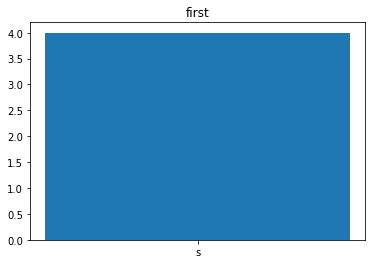

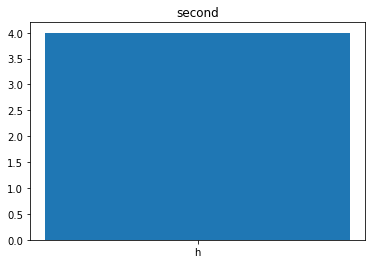

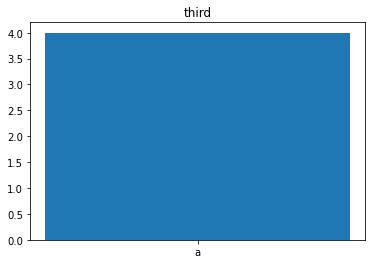

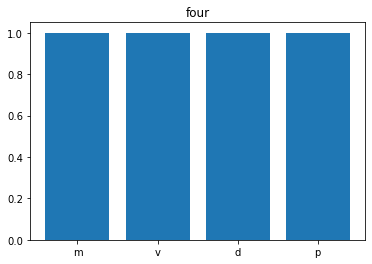

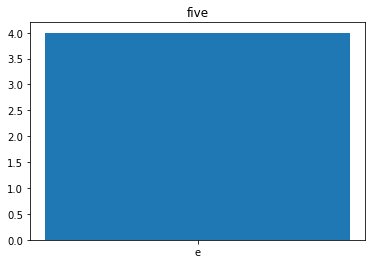

In [39]:
for p in letter_rate_2:
    title_list = ["first","second","third","four","five"]
    plt.bar(list(letter_rate_2[p].keys()), letter_rate_2[p].values())
    plt.title(title_list[p])
    plt.show()